In [19]:
# this will be replacing QuoteSocketChart.py as the charting tool for showing data from quote socket.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
# parse the ResultQuoteSocket into a table
df = pd.read_json('ResultQuoteSocket.json')
df['quoteTime'] = pd.to_datetime(df['quoteTime'])
df.dtypes

ask                 float64
askDepth              int64
askSize               int64
bid                 float64
bidDepth              int64
bidSize               int64
last                float64
lastSize            float64
lastTrade            object
quoteTime    datetime64[ns]
symbol               object
venue                object
dtype: object

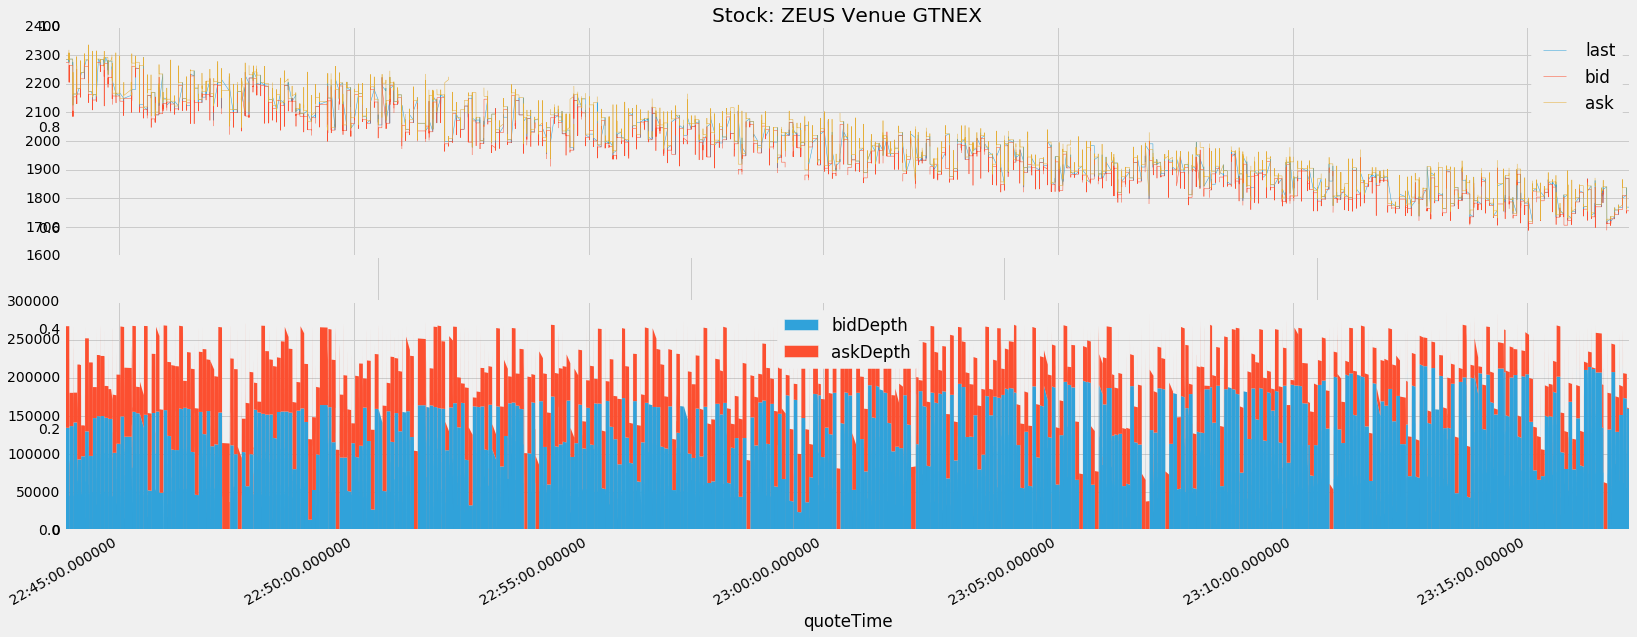

In [24]:
depths = df[['quoteTime','bidDepth','askDepth']]
prices = df[['quoteTime','last','bid','ask']]

fig = plt.figure(figsize=(25,10))
plt.title('Stock: %s Venue %s' %(df['symbol'][0], df['venue'][0]))
ax1 = fig.add_subplot(2,1,1)
prices.plot(x='quoteTime', linewidth = .5, ax=ax1)
ax2 = fig.add_subplot(2,1,2)
depths.plot(kind='area', x='quoteTime', linewidth = 0, sharex=ax1, ax=ax2)
plt.show() 
fig.savefig('quotes.png')
